In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import math
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array

from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential

from keras.optimizers import Adam,SGD,RMSprop

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\DL kunskapskotroll\\fer2013.csv")
df.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
df.shape

(35887, 3)

In [4]:
emotion_map = {0: ' Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = df['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Fear,5121
2,Sad,6077
3,Neutral,6198
4,Happy,8989
5,Surprise,4002
6,Digust,547


In [5]:
math.sqrt(len(df.pixels[0].split(' ')))

48.0

In [6]:
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

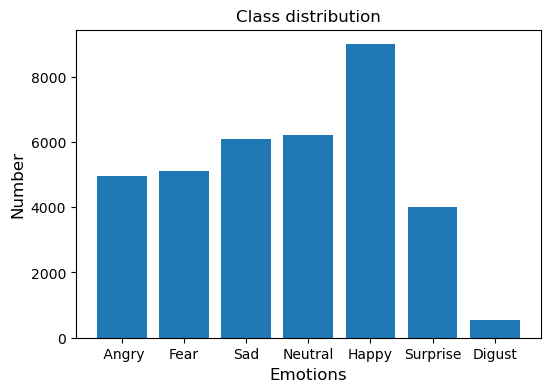

In [7]:
plt.figure(figsize=(6, 4))
plt.bar(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.show()

In [8]:
# Define the mapping from emotion label to text
emotion_label_to_text = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

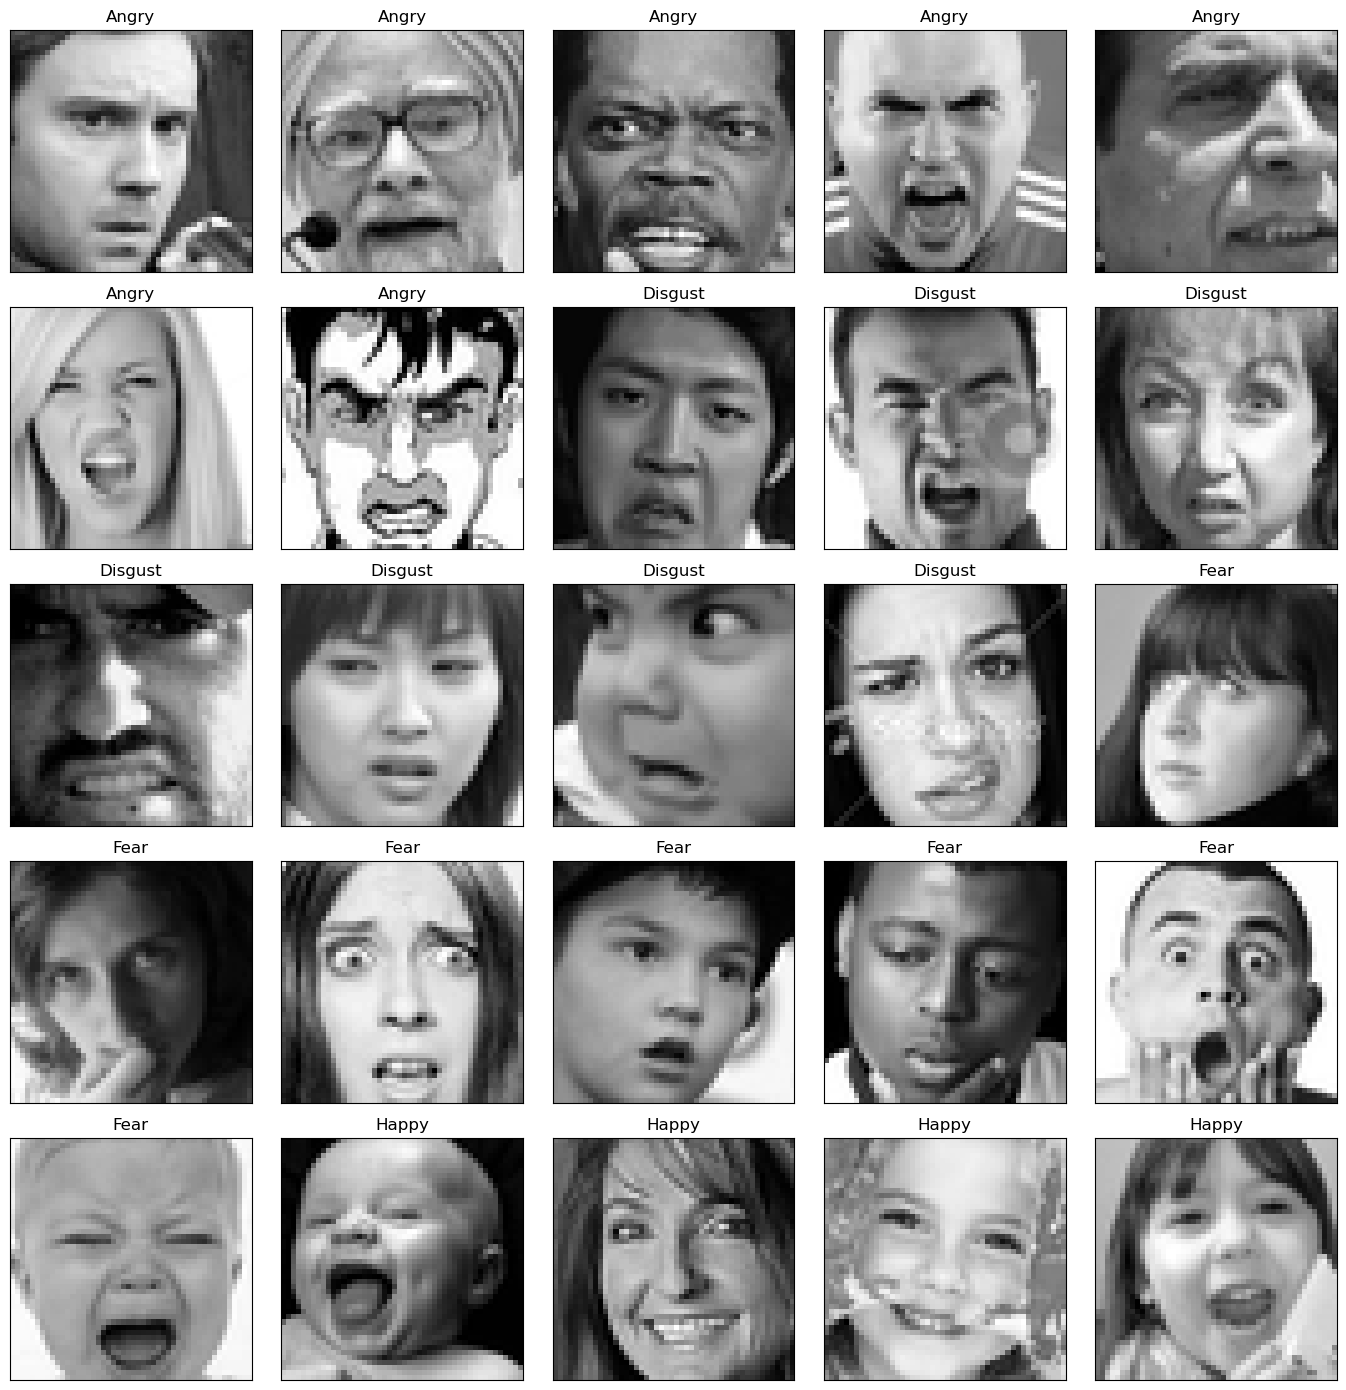

In [9]:
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):  # Försök att skapa upp till 7 bilder per kategori
        if k >= 25:  # Bryt loopen om k når max antal tillåtna subplots
            break
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(5, 5, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()


In [10]:
x = []
y = []
first = True
with open("C:\\Users\\Admin\\Desktop\\DL kunskapskotroll\\fer2013.csv", 'r') as f:
    for line in f:
        if first:
            first = False
        else:
            row = line.split(',')
            x.append([int(p) for p in row[1].split()])
            y.append(int(row[0]))

# Normalize the pixel values
x = np.array(x) / 255.0
y = np.array(y)

print(x.shape, y.shape)

(35887, 2304) (35887,)


In [20]:
x = x.reshape(-1, 48, 48, 1)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
y_train = to_categorical(y_train, num_classes=no_of_classes)
y_test = to_categorical(y_test, num_classes=no_of_classes)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [24]:
datagen.fit(x_train)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam

no_of_classes = 7
input_shape = (48, 48, 1)

model = Sequential()

# Input layer
model.add(Input(shape=input_shape))

# 1st CNN layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='elu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='elu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 2nd CNN layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# 3rd CNN layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='elu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='elu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# 4th CNN layer
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='elu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='elu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(units=1024, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fully connected 2nd layer
model.add(Dense(units=512, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected 3rd layer
model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(units=no_of_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,076,615 (38.44 MB)

 Trainable params: 10,069,191 (38.41 MB)

 Non-trainable params: 7,424 (29.00 KB)

In [28]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=75, validation_data=(x_test, y_test), verbose=1)

Epoch 1/75


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 557s 2s/step - accuracy: 0.1619 - loss: 2.5268 - val_accuracy: 0.2573 - val_loss: 1.8756
Epoch 2/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 539s 2s/step - accuracy: 0.1886 - loss: 2.2153 - val_accuracy: 0.2577 - val_loss: 1.8931
Epoch 3/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 540s 2s/step - accuracy: 0.2124 - loss: 2.0492 - val_accuracy: 0.2580 - val_loss: 1.8262
Epoch 4/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 532s 2s/step - accuracy: 0.2268 - loss: 1.9727 - val_accuracy: 0.2732 - val_loss: 1.8013
Epoch 5/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 534s 2s/step - accuracy: 0.2393 - loss: 1.9130 - val_accuracy: 0.2756 - val_loss: 1.7810
Epoch 6/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 538s 2s/step - accuracy: 0.2540 - loss: 1.8704 - val_accuracy: 0.2758 - val_loss: 1.7819
Epoch 7/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 536s 2s/step - accuracy: 0.2670 - loss: 1.8281 - val_accuracy: 0.2817 - val_loss: 1.7868
Epoch 8/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 531s 2s/step - accuracy: 0.2776 - loss: 1.7974 - val_accuracy: 0.306

225/225 ━━━━━━━━━━━━━━━━━━━━ 546s 2s/step - accuracy: 0.5898 - loss: 1.0788 - val_accuracy: 0.6049 - val_loss: 1.0542
Epoch 52/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 541s 2s/step - accuracy: 0.5900 - loss: 1.0733 - val_accuracy: 0.6108 - val_loss: 1.0258
Epoch 53/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - accuracy: 0.5930 - loss: 1.0630 - val_accuracy: 0.6170 - val_loss: 1.0179
Epoch 54/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 538s 2s/step - accuracy: 0.6027 - loss: 1.0407 - val_accuracy: 0.6142 - val_loss: 1.0508
Epoch 55/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 542s 2s/step - accuracy: 0.6007 - loss: 1.0532 - val_accuracy: 0.6194 - val_loss: 1.0116
Epoch 56/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - accuracy: 0.6040 - loss: 1.0418 - val_accuracy: 0.6251 - val_loss: 1.0105
Epoch 57/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 541s 2s/step - accuracy: 0.6040 - loss: 1.0318 - val_accuracy: 0.6160 - val_loss: 1.0329
Epoch 58/75
225/225 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.6060 - loss: 1.0369 - val_accuracy

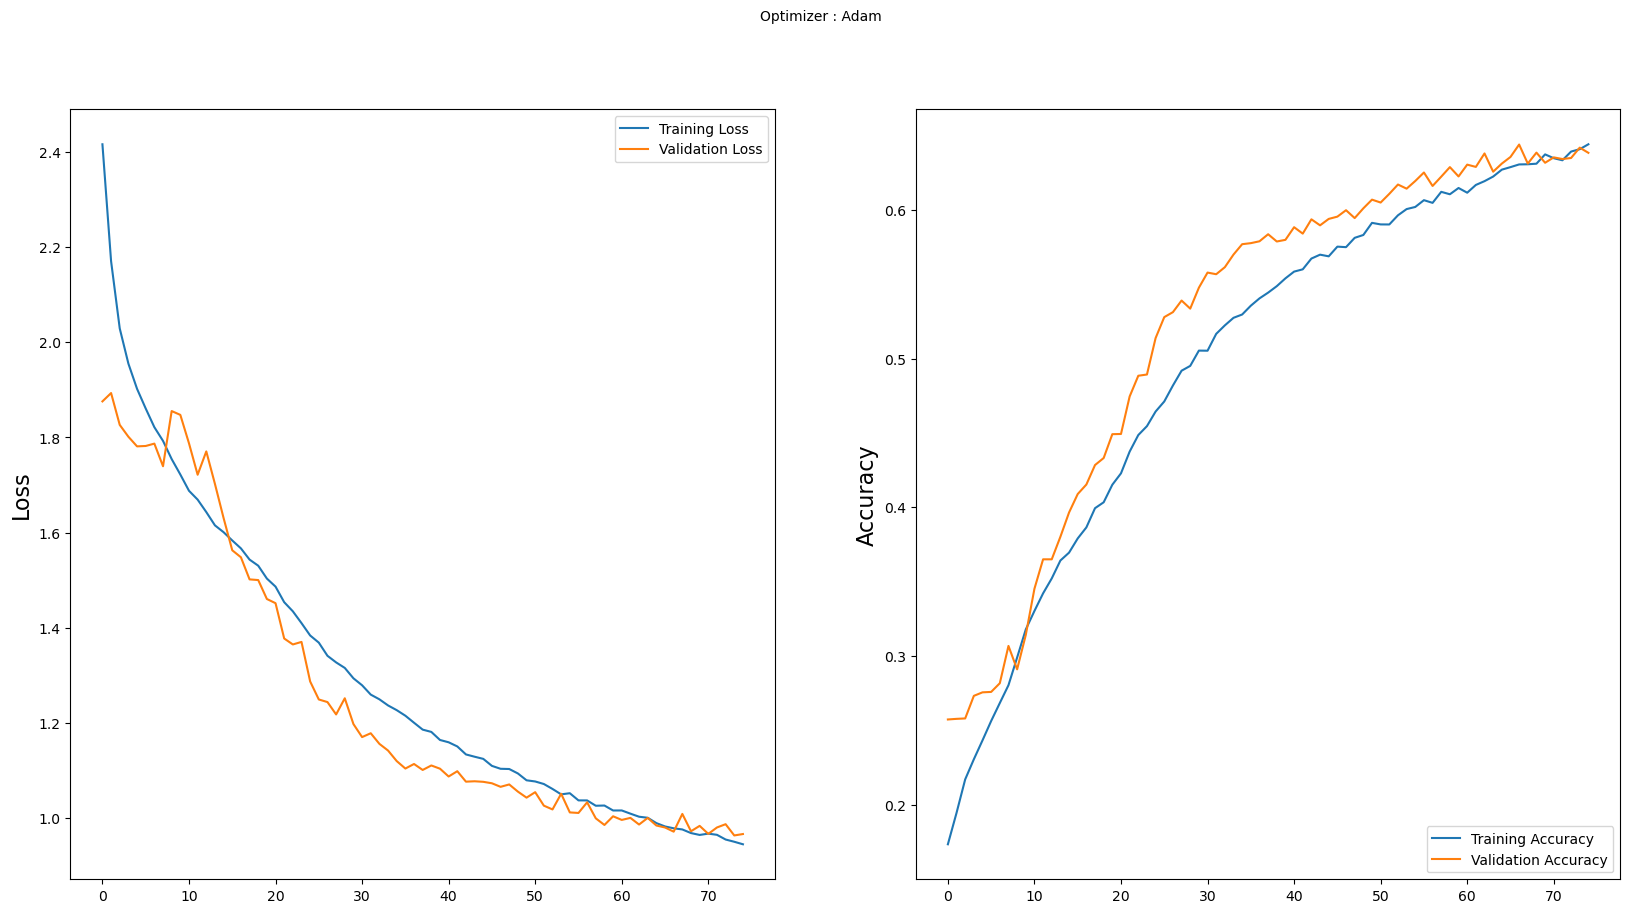

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
     

In [30]:
model.save('model.h5')

In [31]:
model.save('my_model.keras')

In [49]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


# jag lyckades kombinera med kön 

In [ ]:
#emotion, jag har tränat många gånger utanfär provet, den här modell jag sparade var så långsamt, men resulat var jag nöjd. 
eftersom könsetiketten är slumpmässigt vald, så det kan ge fel svar, vill man har bättre svar, då kan man träna modell och kombinera modellen. 

Video device opened successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


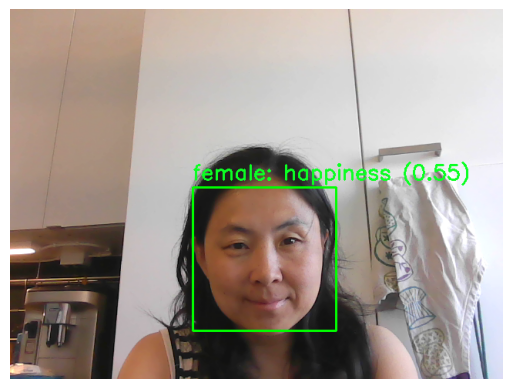

In [7]:

# Etiketter för emotion och kön (använda enkla etiketter för demonstration)
emotion_labels = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
gender_labels = {0: 'male', 1: 'female'}

# Ladda den förtränade emotion-modellen
emotion_model = load_model('my_model.keras')

# Starta videokameran
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open video device")
else:
    print("Video device opened successfully")

def show_image_with_matplotlib(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.draw()
    plt.pause(0.001)  # Lägger till en liten paus för att tillåta uppdatering

plt.ion()  # Interaktivt läge för matplotlib

# För att avsluta loopen när användaren trycker på en knapp
def press(event):
    global take_picture, running
    if event.key == 'q':  # Tryck 'q' för att avsluta programmet
        running = False
        plt.close()
    elif event.key == 'n':  # Tryck 'n' för att ta nästa bild
        take_picture = True

fig, ax = plt.subplots()
fig.canvas.mpl_connect('key_press_event', press)

running = True
take_picture = True

while running:
    if take_picture:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame")
            break
        
        # Konvertera färgramen till gråskala
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Använd Haar-kaskad eller annan metod för ansiktsdetektion
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
        
        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_gray = cv2.resize(roi_gray, (48, 48))
            roi_gray = roi_gray.astype("float") / 255.0
            roi_gray = img_to_array(roi_gray)
            roi_gray = np.expand_dims(roi_gray, axis=0)
            
            # Gör emotion-förutsägelser
            emotion_preds = emotion_model.predict(roi_gray)
            emotion_prob = np.max(emotion_preds)
            emotion_label = emotion_labels[np.argmax(emotion_preds)]
            
            # Enkel könsprediktion (för demonstration)
            gender_label = gender_labels[np.random.randint(0, 2)]
            
            # Rita rektanglar runt ansikten och visa förutsägelser
            text = f"{gender_label}: {emotion_label} ({emotion_prob:.2f})"
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
        
        # Visa ramen med matplotlib
        show_image_with_matplotlib(frame)
        
        # Vänta på nästa knapptryckning
        take_picture = False

    # Avsluta om matplotlib-fönstret stängs
    if not plt.fignum_exists(fig.number):
        break

# Frigör kameran
cap.release()
plt.close()


# Utmaningar du haft under arbetet samt hur du hanterat dem.
Vilket betyg du anser att du skall ha och varför.
Jag är ganska nöjad av mitt arbete och jag har lärt mig träna modeller både på lektioner och egen arbete. 
